### Exercise 1

Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [6]:
import pandas as pd
df = pd.read_csv('/workspaces/707-warm-up-assignment-2-vgaikwad7/data/2019_Yellow_Taxi_Trip_Data.csv')
df.head(5)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


### Exercise 2

Find the dimensions (number of rows and number of columns) in the data.

In [7]:
df.shape

(10000, 18)

#### Exercise 3

Calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [9]:
df[["fare_amount", "tip_amount", "tolls_amount", "total_amount"]].describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 4

Count the number of NAs in each column.

In [10]:
df.isna().sum()

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

#### Exercise 5

Read the `2019_Yellow_Taxi_Trip_Data.csv` into Pandas. Use a scatter plot matrix (in pandas) to visualize continuous data columns.  That is, drop columns that appear to be ids. Do not visualize date columns.

array([[<Axes: xlabel='passenger_count', ylabel='passenger_count'>,
        <Axes: xlabel='trip_distance', ylabel='passenger_count'>,
        <Axes: xlabel='payment_type', ylabel='passenger_count'>,
        <Axes: xlabel='fare_amount', ylabel='passenger_count'>,
        <Axes: xlabel='extra', ylabel='passenger_count'>,
        <Axes: xlabel='mta_tax', ylabel='passenger_count'>,
        <Axes: xlabel='tip_amount', ylabel='passenger_count'>,
        <Axes: xlabel='tolls_amount', ylabel='passenger_count'>,
        <Axes: xlabel='improvement_surcharge', ylabel='passenger_count'>,
        <Axes: xlabel='total_amount', ylabel='passenger_count'>,
        <Axes: xlabel='congestion_surcharge', ylabel='passenger_count'>],
       [<Axes: xlabel='passenger_count', ylabel='trip_distance'>,
        <Axes: xlabel='trip_distance', ylabel='trip_distance'>,
        <Axes: xlabel='payment_type', ylabel='trip_distance'>,
        <Axes: xlabel='fare_amount', ylabel='trip_distance'>,
        <Axes: xlabel='

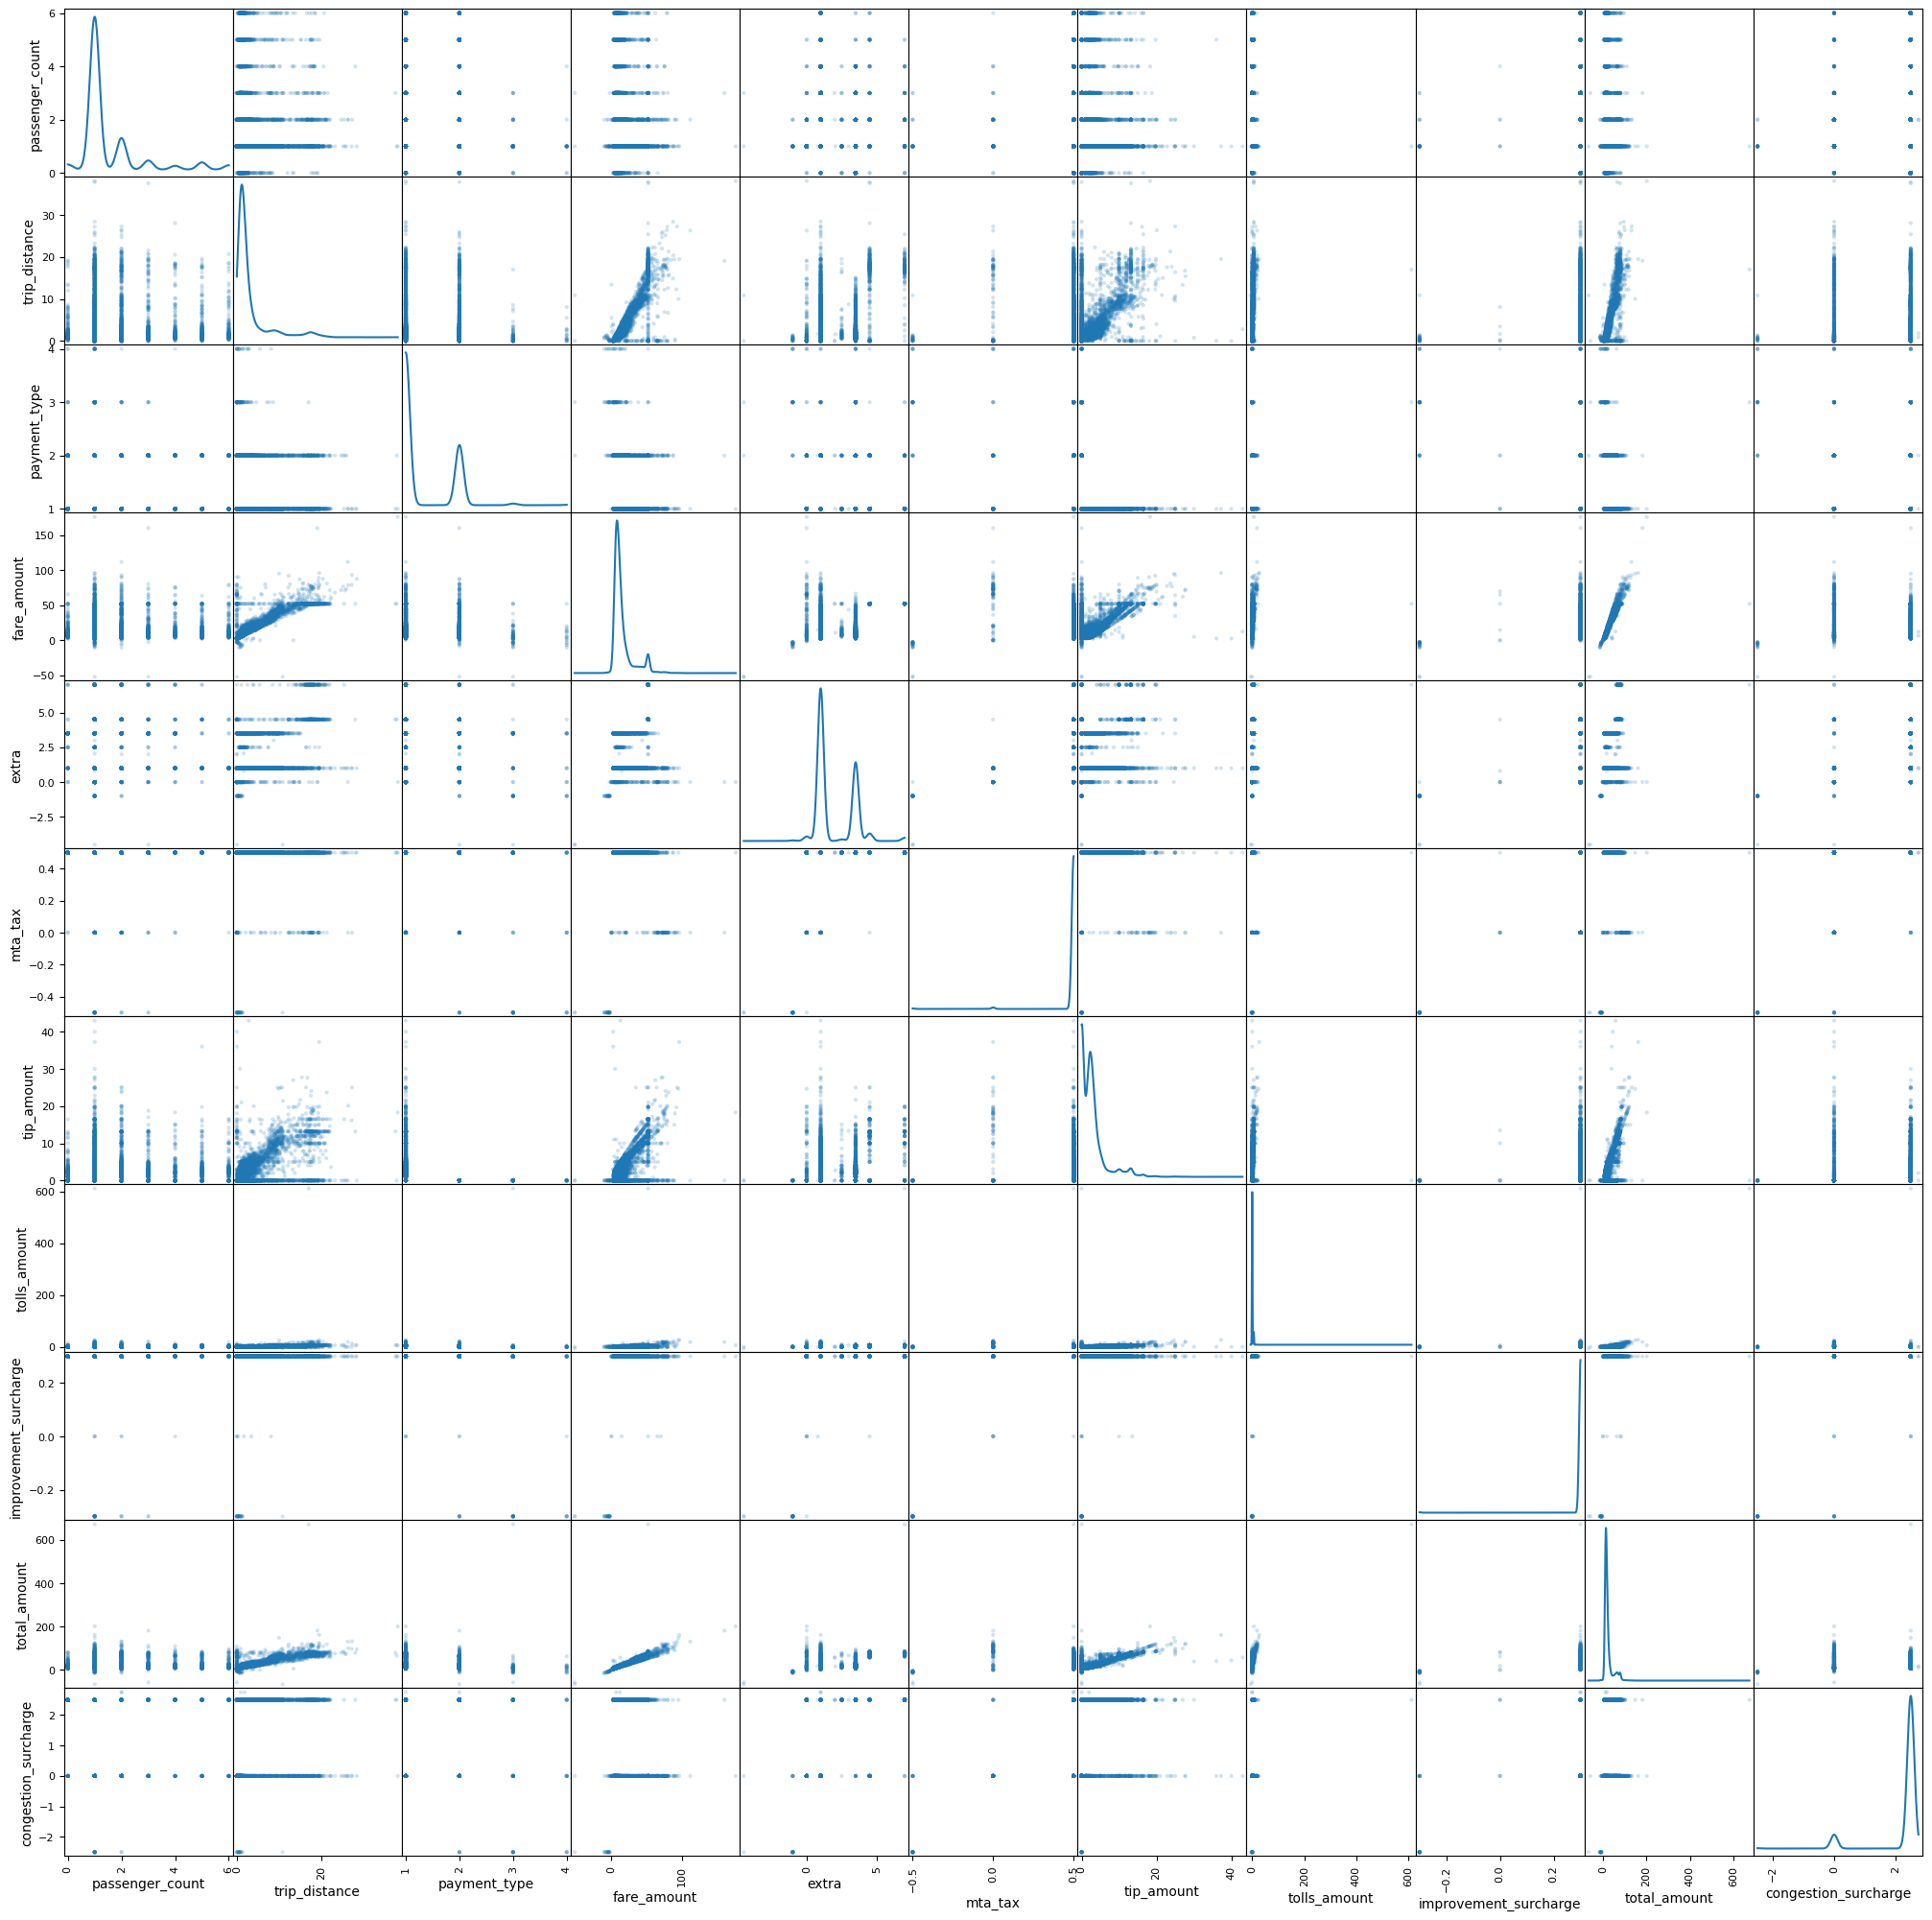

In [23]:
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix

df_plot = pd.read_csv('/workspaces/707-warm-up-assignment-2-vgaikwad7/data/2019_Yellow_Taxi_Trip_Data.csv')
id_columns = ['vendorid', 'ratecodeid', 'pulocationid', 'dolocationid', 'tpep_pickup_datetime','tpep_dropoff_datetime']
df_plot = df_plot.drop(columns=id_columns)
df_plot.shape
scatter_matrix(df_plot, alpha=0.2,figsize=(25,25),diagonal='kde')

#### Exercise 6

Examine the distribution of just the `total_amount` column.  Are there outliers? How can you tell?

{'whiskers': [<matplotlib.lines.Line2D at 0x7f678d08dcf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f678d08e230>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f678d08da50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f678d08e770>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f678d08ea10>],
 'means': []}

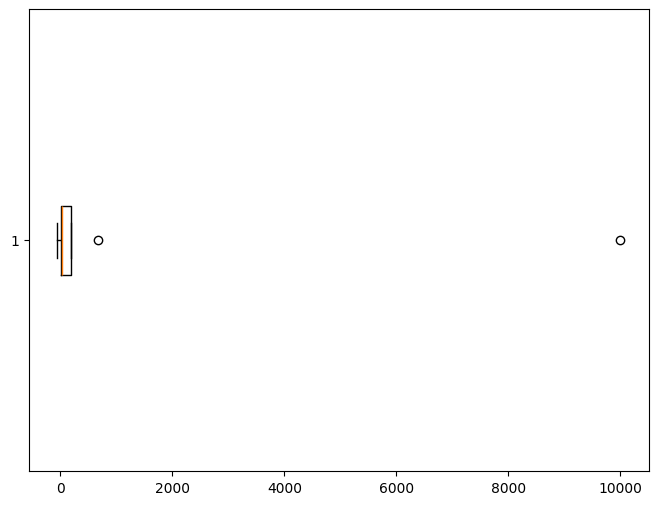

In [19]:
df_plot["total_amount"].describe()
plt.figure(figsize=(8, 6))
plt.boxplot(df["total_amount"].describe(), vert=False)

Boxplot visualization is the most common method used to check whether there are outliers or not, the points far beyond whiskers are outlier and according to the above boxplot, there are outliers 

#### Exercise 7

Use a logistic regression classifier and a simple train / test split, find a subset of features that best predict the `fare_amount`.  Do not use `total_amount` or `tip_amount` as features. 

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt



df_pred = pd.read_csv('/workspaces/707-warm-up-assignment-2-vgaikwad7/data/2019_Yellow_Taxi_Trip_Data.csv')


features = df_pred[['passenger_count', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
                    'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge']]
target = df_pred['fare_amount']

features = pd.get_dummies(features, columns=['store_and_fwd_flag', 'payment_type'], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mean_square = mean_squared_error(y_test, y_pred)
root_mean = sqrt(mean_square)

print(f"Root Mean Squared Error (RMSE): {root_mean}")

Root Mean Squared Error (RMSE): 6.478517328451532


#### Exercise 8

Do the same thing you did in 7, but use a decision tree classifier.  Which works better? Why do you think that is?


In [26]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mean_sq = mean_squared_error(y_test, y_pred)
rootMean = sqrt(mean_sq)

print(f"Root Mean Squared Error (RMSE) using Decision Tree Regressor: {rootMean}")

Root Mean Squared Error (RMSE) using Decision Tree Regressor: 5.700240656471277


After comparing both root mean squared error, it can be said that as decision tree classifier is better than logistic regression as it has lower RMSE (5.70)